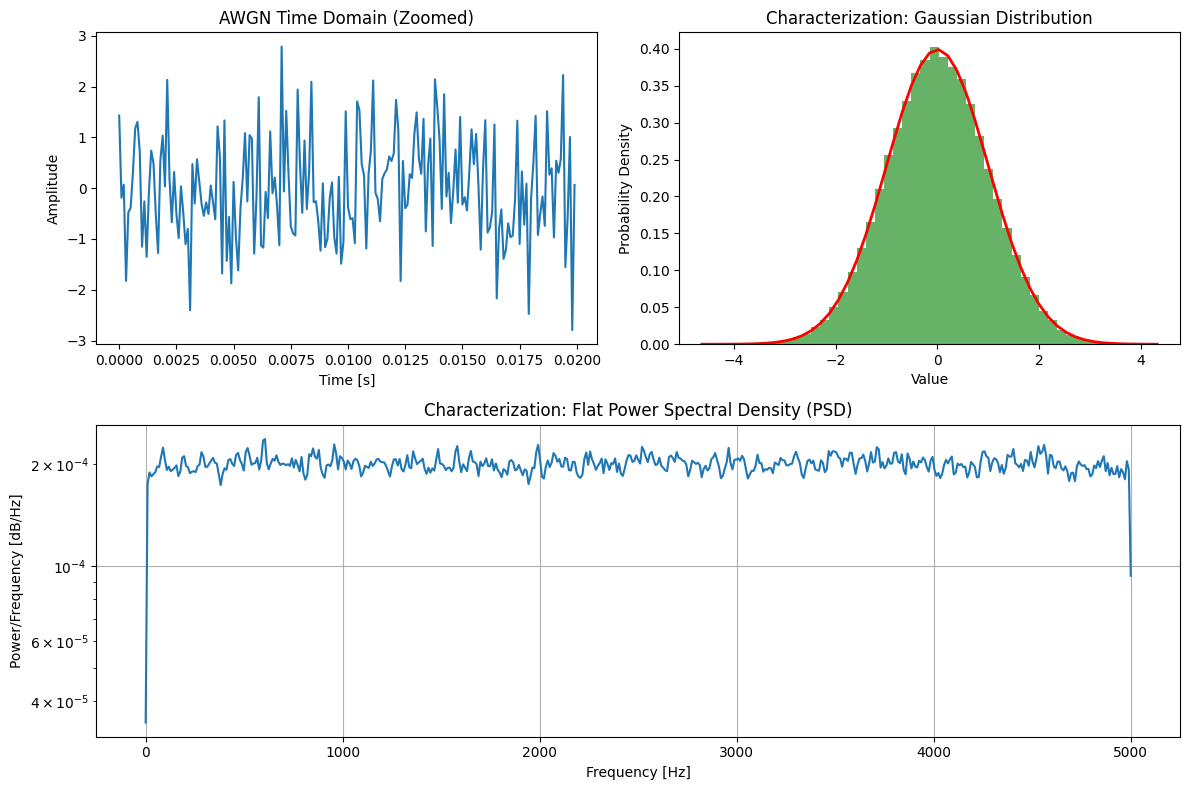

--- AWGN Statistical Characterization ---
Measured Mean: 0.0005 (Ideal: 0)
Measured Variance: 1.0013 (Ideal: 1)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.signal import welch

# 1. Generation Parameters
sample_rate = 10000  # Hz
duration = 20        # seconds
n_samples = sample_rate * duration
mean = 0
sigma = 1  # Standard deviation

# Generate AWGN
time = np.linspace(0, duration, n_samples)
noise = np.random.normal(mean, sigma, n_samples)

# 2. Characterization & Visualization
plt.figure(figsize=(12, 8))

# Time Domain Plot
plt.subplot(2, 2, 1)
plt.plot(time[:200], noise[:200]) # Plotting first 200 samples for clarity
plt.title("AWGN Time Domain (Zoomed)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Probability Density Function (Histogram)
plt.subplot(2, 2, 2)
count, bins, ignored = plt.hist(noise, 50, density=True, alpha=0.6, color='g')
# Overlay theoretical Gaussian curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title("Characterization: Gaussian Distribution")
plt.xlabel("Value")
plt.ylabel("Probability Density")

# Frequency Domain (Power Spectral Density)
f, psd = welch(noise, sample_rate, nperseg=1024)
plt.subplot(2, 1, 2)
plt.semilogy(f, psd)
plt.title("Characterization: Flat Power Spectral Density (PSD)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power/Frequency [dB/Hz]")
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Statistical Summary
print(f"--- AWGN Statistical Characterization ---")
print(f"Measured Mean: {np.mean(noise):.4f} (Ideal: 0)")
print(f"Measured Variance: {np.var(noise):.4f} (Ideal: {sigma**2})")